In [1]:
import pandas as pd

# Loading the data
orders_df = pd.read_csv('C:/Users/97254/TEST_CSV/orders.csv')
order_item_df = pd.read_csv('C:/Users/97254/TEST_CSV/order_item.csv')
items_df = pd.read_csv('C:/Users/97254/TEST_CSV/items.csv')
customers_df = pd.read_csv('C:/Users/97254/TEST_CSV/customers.csv')

# Checking the column names in the tables
print(items_df.columns)  # Check the column names in the items DataFrame
print(order_item_df.columns)  # Check the column names in the order_item DataFrame
print(customers_df.columns)  # Check the column names in the customers DataFrame
print(orders_df.columns)  # Check the column names in the orders DataFrame

Index(['id', 'item_name', 'item_category', 'item_price', 'stock_quantity',
       'item_brand', 'item_availability'],
      dtype='object')
Index(['id', 'order_id', 'item_id', 'quantity'], dtype='object')
Index(['id', 'first_name', 'last_name', 'gender', 'age', 'nationallity',
       'joining_date', 'phone_number', 'email'],
      dtype='object')
Index(['order_id', 'customer_id', 'delivery_address', 'delivery_days',
       'order_date', 'payment_method', 'order_source'],
      dtype='object')


In [2]:
# 1. Calculate the average price of an item
average_price = items_df['item_price'].mean()
print(f"Average price of item: {average_price}")


Average price of item: 2222.0825999999997


In [3]:
# 2. Merge order_item_df with orders_df to get the 'customer_id'
order_item_df = order_item_df.merge(orders_df[['order_id', 'customer_id']], on='order_id', how='left')

# Total quantity purchased by each customer
total_purchases_per_customer = order_item_df.groupby('customer_id')['quantity'].sum()

# The customer with the most purchases
top_customer = total_purchases_per_customer.idxmax()
top_customer_quantity = total_purchases_per_customer.max()
print(f"Customer with most purchases: {top_customer} (Total: {top_customer_quantity})")

Customer with most purchases: 138.0 (Total: 45)


In [6]:
#3
# Calculate the 'price_total' by multiplying 'item_price' with 'quantity'
order_item_df['price_total'] = order_item_df['item_price'] * order_item_df['quantity']

# Display the data to ensure the column was added successfully
print(order_item_df[['order_id', 'item_id', 'quantity', 'item_price', 'price_total']].head())


   order_id  item_id  quantity  item_price  price_total
0       337     10.0         2      453.85       907.70
1       430     27.0         6     1283.99      7703.94
2       430     36.0         2     3256.88      6513.76
3       508     46.0         1     1606.65      1606.65
4       229     27.0         2     1283.99      2567.98


In [11]:
#4
# Summary of the total price for each order (order_id)
total_price_per_order = order_item_df.groupby('order_id')['price_total'].sum().reset_index()

#Display of each order and total price
print(total_price_per_order)


     order_id  price_total
0           1      8554.20
1           2     10148.58
2           3      6843.36
3           4       965.20
4           5     63944.94
..        ...          ...
438       593      2301.74
439       594     62560.06
440       596     17830.10
441       597      1710.84
442       599     29979.05

[443 rows x 2 columns]


In [12]:
#5
# 1. Find the most expensive purchase
most_expensive_purchase = order_item_df.loc[order_item_df['price_total'].idxmax()]

# 2. Find the least expensive purchase
least_expensive_purchase = order_item_df.loc[order_item_df['price_total'].idxmin()]

# 3. Calculate the average purchase price
average_purchase_price = order_item_df['price_total'].mean()

# Print the results
print(f"Most expensive purchase: {most_expensive_purchase}")
print(f"Least expensive purchase: {least_expensive_purchase}")
print(f"Average purchase price: {average_purchase_price}")


Most expensive purchase: id_x              899.00
order_id          190.00
item_id             9.00
quantity            9.00
customer_id       427.00
id_y                9.00
item_price_x     4471.27
price_total     40241.43
id                  9.00
item_price_y     4471.27
Name: 898, dtype: float64
Least expensive purchase: id_x            157.00
order_id        451.00
item_id          31.00
quantity          1.00
customer_id     432.00
id_y             31.00
item_price_x    241.54
price_total     241.54
id               31.00
item_price_y    241.54
Name: 156, dtype: float64
Average purchase price: 6728.2549895833345


In [24]:
#6
# Creating a pivot table: nationality as an index, gender as columns, and the number of customers in each group
pivot_table = customers_df.pivot_table(index='nationallity', columns='gender', aggfunc='size', fill_value=0)

# Displaying the table
print(pivot_table)


gender         Agender  Bigender  Female  Genderfluid  Genderqueer  Male  \
nationallity                                                               
Argentina            1         0      10            1            0     9   
Brazil               0         0       6            0            0    17   
Chile                1         0      14            0            0     9   
China                0         0       5            1            1     9   
France               1         0      15            1            0    10   
Germany              0         0      12            0            0     3   
India                1         0       8            0            0    15   
Isreal               2         1      20            5            1    31   
Italy                0         0      15            0            2    11   
Japan                2         0      12            0            0     8   
Peru                 1         0      12            1            0     6   
South Korea 

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data (ensure the path is correct)
customers_df = pd.read_csv('C:/Users/97254/TEST_CSV/customers.csv')
orders_df = pd.read_csv('C:/Users/97254/TEST_CSV/orders.csv')
order_item_df = pd.read_csv('C:/Users/97254/TEST_CSV/order_item.csv')
items_df = pd.read_csv('C:/Users/97254/TEST_CSV/items.csv')

# Remove rows with missing values in important columns
customers_clean_df = customers_df.dropna(subset=['gender', 'age', 'nationallity', 'joining_date'])
orders_clean_df = orders_df.dropna(subset=['order_date'])
order_item_clean_df = order_item_df.dropna(subset=['quantity'])



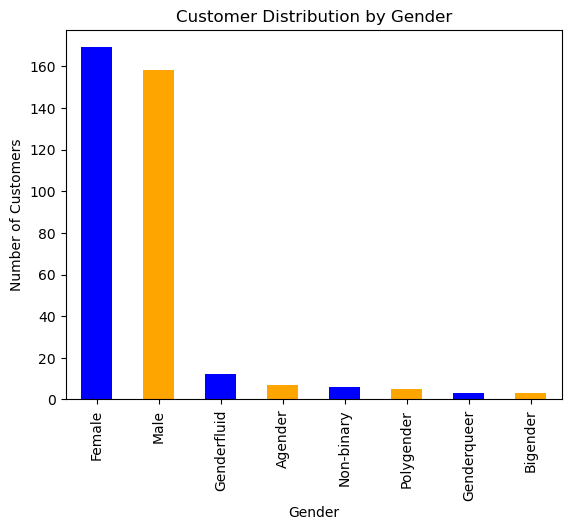

In [27]:
# 1. Distribution of customers by gender
gender_counts = customers_clean_df['gender'].value_counts()
gender_counts.plot(kind='bar', color=['blue', 'orange'], title='Customer Distribution by Gender', xlabel='Gender', ylabel='Number of Customers')
plt.show()



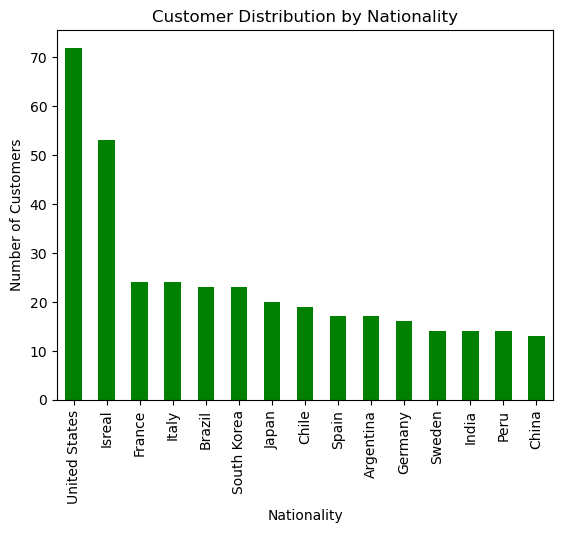

In [28]:
# 2. Distribution of customers by nationality
nationality_counts = customers_clean_df['nationallity'].value_counts()
nationality_counts.plot(kind='bar', color='green', title='Customer Distribution by Nationality', xlabel='Nationality', ylabel='Number of Customers')
plt.show()



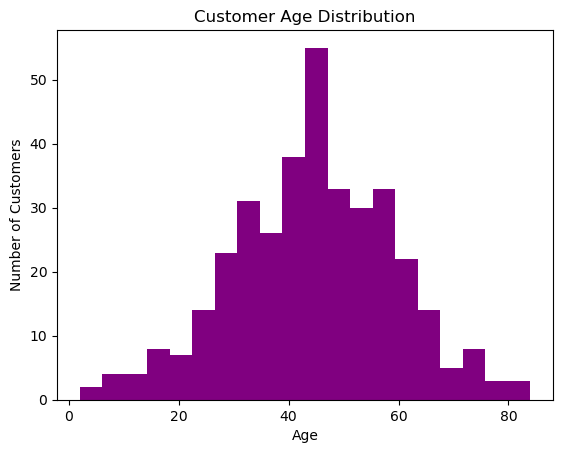

In [29]:
# 3. Histogram of customers by age
customers_clean_df['age'].plot(kind='hist', bins=20, color='purple', title='Customer Age Distribution', xlabel='Age', ylabel='Number of Customers')
plt.show()



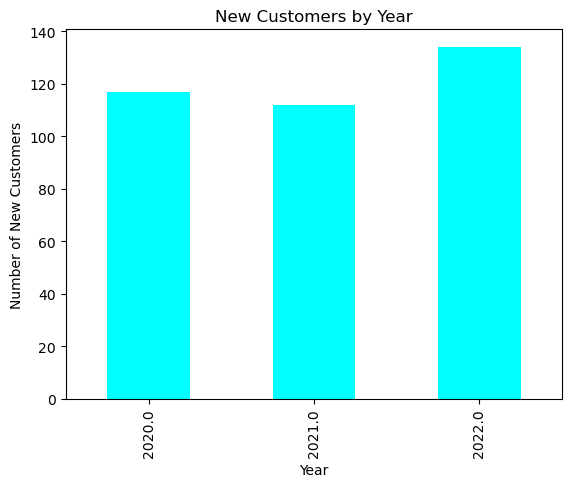

In [47]:
# 4.
#  I Used .loc[] to avoid the SettingWithCopyWarning
# Convert 'joining_date' to datetime
customers_clean_df.loc['joining_date'] = pd.to_datetime(customers_clean_df['joining_date'], format='%d/%m/%Y', errors='coerce')

# Extract the year from 'joining_date'
customers_clean_df.loc['year_joined'] = customers_clean_df['joining_date'].dt.year

# Count the number of new customers each year
yearly_join_counts = customers_clean_df['year_joined'].value_counts().sort_index()

# Plot the results
yearly_join_counts.plot(kind='bar', color='cyan', title='New Customers by Year', xlabel='Year', ylabel='Number of New Customers')
plt.show()




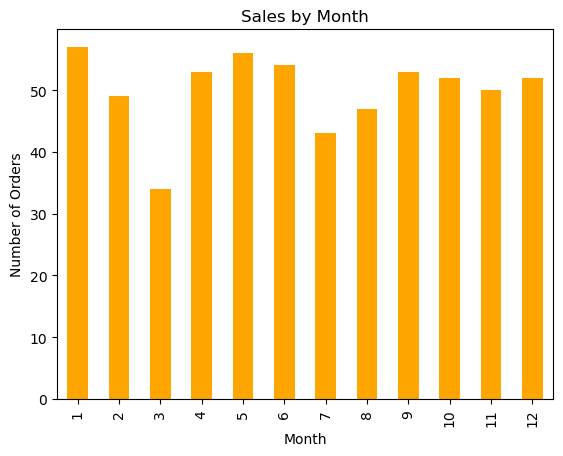

In [32]:
# 5. Sales by month
orders_clean_df['order_date'] = pd.to_datetime(orders_clean_df['order_date'])
orders_clean_df['month'] = orders_clean_df['order_date'].dt.month
monthly_sales_counts = orders_clean_df['month'].value_counts().sort_index()
monthly_sales_counts.plot(kind='bar', color='orange', title='Sales by Month', xlabel='Month', ylabel='Number of Orders')
plt.show()



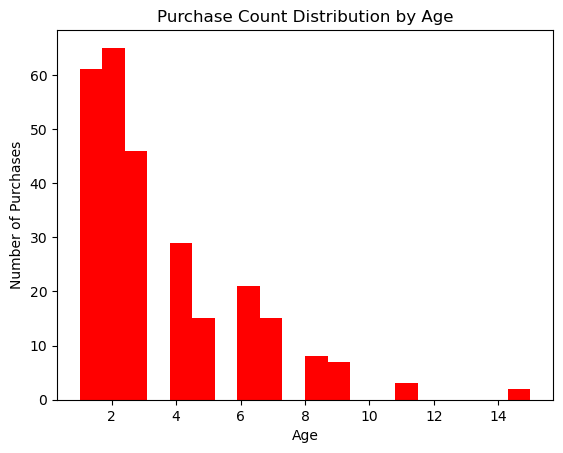

In [33]:
# 6. Histogram of customer purchases by age (consider each purchase once, not the quantity)
# Merge the order_item_df with orders to get the customer_id
order_item_df = order_item_df.merge(orders_df[['order_id', 'customer_id']], on='order_id', how='left')

# Count the number of unique purchases by customer and merge with customer age data
purchase_counts_by_customer = order_item_df.groupby('customer_id').size().reset_index(name='purchase_count')
purchase_counts_by_customer = purchase_counts_by_customer.merge(customers_clean_df[['id', 'age']], left_on='customer_id', right_on='id', how='left')

# Plot histogram for purchase count distribution by age
purchase_counts_by_customer['purchase_count'].plot(kind='hist', bins=20, color='red', title='Purchase Count Distribution by Age', xlabel='Age', ylabel='Number of Purchases')
plt.show()

